In [1]:
def frequency_spectrum(sample, max_frequency=4186.009):
    # For single note, the highest note frequency = 4186.009 (for 88 keys piano)
    """
    Derive frequency spectrum of a signal pydub.AudioSample
    Returns an array of frequencies and an array of how prevelant that frequency is in the sample
    """
    # Convert pydub.AudioSample to raw audio data
    # Copied from Jiaaro's answer on https://stackoverflow.com/questions/32373996/pydub-raw-audio-data
    bit_depth = sample.sample_width * 8
    array_type = get_array_type(bit_depth)
    raw_audio_data = array.array(array_type, sample._data)
#     print(raw_audio_data)
    n = len(raw_audio_data)

    # Compute FFT and frequency value for each index in FFT array
    # Inspired by Reveille's answer on https://stackoverflow.com/questions/53308674/audio-frequencies-in-python
    freq_array = np.arange(n) * (float(sample.frame_rate) / n)  # two sides frequency range
    freq_array = freq_array[: (n // 2)]  # one side frequency range

    raw_audio_data = raw_audio_data - np.average(raw_audio_data)  # zero-centering
    freq_magnitude = fft(raw_audio_data)  # fft computing and normalization
    freq_magnitude = freq_magnitude[: (n // 2)]  # one side

    if max_frequency:
        max_index = int(max_frequency * n / sample.frame_rate) + 1
        freq_array = freq_array[:max_index]
        freq_magnitude = freq_magnitude[:max_index]

    freq_magnitude = abs(freq_magnitude)
    freq_magnitude = freq_magnitude / np.sum(freq_magnitude)

    return freq_array, freq_magnitude

In [2]:
def detect_onsets(file_name):
    # Loading audio file
    audio = MonoLoader(filename=file_name)()
    # Computing onset detection functions.
    od1 = OnsetDetection(method='hfc')

    w = Windowing(type = 'hann')
    fft = FFT() # this gives us a complex FFT
    c2p = CartesianToPolar() # and this turns it into a pair (magnitude, phase)
    pool = essentia.Pool()

    for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
        mag, phase, = c2p(fft(w(frame)))
        pool.add('features.hfc', od1(mag, phase))

    # compute the actual onsets locations
    onsets = Onsets()

    onsets_hfc = onsets(essentia.array([ pool['features.hfc'] ]), [ 1 ])
#     print("number of onsets:", len(onsets_hfc))
#     if len(onsets_hfc) > 0:
#         print("first onsets: ", onsets_hfc[0])
#     else:
#         print("no onset")

    return onsets_hfc

In [3]:
a = str(1+1) + '4'
print(a)

24


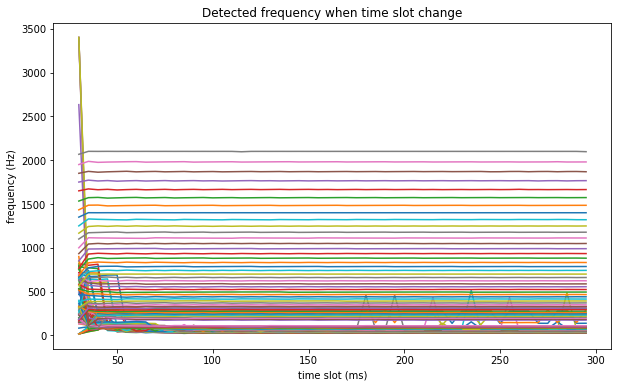

In [4]:

import array
import numpy as np
import scipy
from pydub.utils import get_array_type
from scipy.fft import fft
import sys
#sys.path.append("/usr/local/lib/python3.7/site-packages")
sys.path.append("/usr/local/lib/python3.8/site-packages")
import essentia
# import essentia.standard as es
from essentia.standard import *
from pydub import AudioSegment

from pylab import plot, show, figure, imshow
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6) 

# song = AudioSegment.from_file("/Users/linyaya/Desktop/fyp/single/2.mp3")
# freq_array, freq_magnitude = frequency_spectrum(song[0:200])
# plt.plot(freq_array, freq_magnitude, 'b')
# plt.show()
# print(freq_array[np.argmax(freq_magnitude)])

# i_array = []
# freq_result = []

# onset = detect_onsets("/Users/linyaya/Desktop/fyp/single/2.mp3")
# print(onset)
    
# for i in range(30, 500, 10):
#     i_array.append(i)
#     freq_array, freq_magnitude = frequency_spectrum(song[onset[1]:onset[1] + i])
#     freq_result.append(freq_array[np.argmax(freq_magnitude)])
#     print(freq_array[np.argmax(freq_magnitude)], " ", i)
# plt.plot(i_array, freq_result)
# plt.show()


for k in range(88):
    file_name = "/Users/linyaya/Desktop/fyp/single/" + str(k+1) + ".mp3"
    song = AudioSegment.from_file(file_name)
    onset = detect_onsets(file_name)
#     print("onset", onset, " ", k+1)
#     freq_array, freq_magnitude = frequency_spectrum(song[onset[0]:onset[0] + 125])
#     freq_result.append(freq_array[np.argmax(freq_magnitude)])
#     print(freq_array[np.argmax(freq_magnitude)], " ", k+1)
    
    i_array = []
    freq_result = []
    for i in range(30, 300, 5):
        i_array.append(i)
        freq_array, freq_magnitude = frequency_spectrum(song[onset[0]:onset[0] + i])
        freq_result.append(freq_array[np.argmax(freq_magnitude)])
        
    plt.plot(i_array, freq_result)
plt.title('Detected frequency when time slot change')
plt.xlabel('time slot (ms)')
plt.ylabel('frequency (Hz)')
plt.show()
    

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6) # set plot sizes to something larger than default
x_axis = np.arange(13)

a1 = [4,
7,
5,
25,
9,
7,
21,
7,
4,
14,
1,
3,
0]
a2= [6,
34,
16,
25,
12,
33,
14,
51,
4,
22,
1,
3,
0]

a3 = [0,
13,
0,
24,
4,
12,
21,
0,
2,
19,
0,
4,
2]

a4 = [2,
35,
11,
24,
9,
34,
15,
58,
2,
26,
0,
4,
2]




plt.plot(x_axis, a1, label ="fixed freq, bpm = 119")
plt.plot(x_axis, a2, label ="fixed freq, bpm = 120")
plt.plot(x_axis, a3, label ="dynamic freq, max(125, note duration time), bpm = 119")
plt.plot(x_axis, a4, label ="dynamic freq, max(125, note duration time), bpm = 120")
plt.legend(loc='upper left')
plt.title("wrong note classification")
plt.show()

In [ ]:
plt.figure(figsize=(6,9)) #调节图形大小
labels = [u'correct first onset',u'wrong first onset'] #定义标签
sizes = [9,4] #每块值
colors = ['yellowgreen','red'] #每块颜色定义
explode = (0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.show()